# Phase 1 Project: Aviation Safety

In [2]:
import numpy as np
import pandas as pd

In [3]:
import re

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./data/AviationData.csv', encoding = 'latin-1')

F:\Anaconda\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [9]:
df[df['Number.of.Engines'] == 8]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
84080,20191019X90834,Accident,DCA20CA003,2019-10-17,"Tres Pinos, CA",United States,364845N,0121119W,NaN,NaN,Non-Fatal,Substantial,Airplane,N221HV,Kitty Hawk,Heaviside2,No,8.0,Electric,091,NaN,Flight Test,Kitty Hawk Corporation,0.0,0.0,0.0,0.0,VMC,NaN,a software timing error initiated by a battery...,26-09-2020
85148,20200803X34051,Accident,WPR20CA267,2020-08-03,"Jackson, WY",United States,433515N,1104940W,NaN,NaN,Non-Fatal,Substantial,Balloon,N12171,Cameron,A 315,No,8.0,LR,091,NaN,Business,Wyoming Balloon Co,0.0,8.0,1.0,10.0,VMC,NaN,The balloon pilots inability to maintain the ...,26-08-2021
85149,20200803X34135,Accident,WPR20CA263,2020-08-03,"Jackson, WY",United States,433515N,1104940W,NaN,NaN,Non-Fatal,NaN,Balloon,N971LB,Lindstrand,310A,No,8.0,LR,091,NSCH,Business,Wyoming Balloon Co,0.0,13.0,2.0,1.0,VMC,NaN,The pilots inability to arrest the descent ra...,26-08-2021


In [14]:
df['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                                                      61754
Foreign                                                                                                                                                                                                                                                              1999
<br /><br />                                                                                                                                                                                                                                                          167
Factual                                                                                                                                                                                                   

# Which data to look at?

- Make
- Model
- 

In [10]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [8]:
df['Investigation.Type'].value_counts()

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

In [9]:
df['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(174)        1
Fatal(169)        1
Fatal(125)        1
Fatal(156)        1
Fatal(88)         1
Name: Injury.Severity, Length: 109, dtype: int64

In [10]:
df['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [11]:
df['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                  61754
Foreign                                                                                                                                                                                                          1999
<br /><br />                                                                                                                                                                                                      167
Factual                                                                                                                                                                                                           145
The pilot's failure to maintain directional control during the landing roll.                                                                    

In [12]:
df_edited = df.copy()

# Fixing weather cond and injury severity

In [13]:
df_edited['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [14]:
df_edited['Weather.Condition'] = df['Weather.Condition'].replace(to_replace = 'Unk', value = 'UNK')

In [15]:
df_edited['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK     1118
Name: Weather.Condition, dtype: int64

In [16]:
df_edited['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(174)        1
Fatal(169)        1
Fatal(125)        1
Fatal(156)        1
Fatal(88)         1
Name: Injury.Severity, Length: 109, dtype: int64

In [17]:
df_edited['Injury.Severity'].replace('Fatal(349)', 'Fatal', inplace = True)

In [18]:
i = 0
while i <= 270:
    df_edited['Injury.Severity'].replace('Fatal('+str(i)+')', 'Fatal', inplace = True)
    i += 1

In [19]:
df_edited['Injury.Severity'].value_counts()

Non-Fatal      67357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: Injury.Severity, dtype: int64

# Cleaning make col

In [20]:
df_edited['Make'] = df_edited['Make'].astype(str)

In [21]:
df_edited['Make'] = df_edited['Make'].apply(str.lower)

In [22]:
df_edited['Make'].value_counts()

cessna                  27149
piper                   14870
beech                    5372
boeing                   2745
bell                     2722
                        ...  
garlick/guppy               1
sherman                     1
melvin k callen             1
vanatta                     1
columbia helicopters        1
Name: Make, Length: 7588, dtype: int64

In [23]:
makeindex = df_edited['Make'].value_counts().index.tolist()

In [24]:
top20 = makeindex[:20]

In [25]:
top20

['cessna',
 'piper',
 'beech',
 'boeing',
 'bell',
 'mooney',
 'robinson',
 'grumman',
 'bellanca',
 'hughes',
 'schweizer',
 'air tractor',
 'aeronca',
 'mcdonnell douglas',
 'maule',
 'champion',
 'stinson',
 'aero commander',
 'de havilland',
 'luscombe']

In [26]:
df_test = df_edited.copy()

In [26]:
df_test['Make'].value_counts()

cessna              27149
piper               14870
beech                5372
boeing               2745
bell                 2722
                    ...  
schmidt albert d        1
talago                  1
kiesel                  1
halbrook                1
doggett jack            1
Name: Make, Length: 7588, dtype: int64

In [27]:
for ind in df_test.index:
    for inmake in top20:
        if 'bellanca' in df_test['Make'][ind]:
            df_test['Make'][ind] = 'bellanca'
        elif inmake in df_test['Make'][ind] and inmake != 'bellanca':
            df_test['Make'][ind] = inmake
        

<ipython-input-27-a356568d2349>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Make'][ind] = inmake
<ipython-input-27-a356568d2349>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Make'][ind] = 'bellanca'


In [28]:
def make_cleaner(inlist, indf):
    for ind in indf.index:
        for inmake in inlist:
            if 'bellanca' in indf['Make'][ind]:
                indf['Make'][ind] = 'bellanca'
            elif inmake in indf['Make'][ind] and inmake != 'bellanca':
                indf['Make'][ind] = inmake
    return indf

In [29]:
df_edited = make_cleaner(top20, df_edited)

<ipython-input-28-307c50de226a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indf['Make'][ind] = inmake
<ipython-input-28-307c50de226a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indf['Make'][ind] = 'bellanca'


In [30]:
df_test['Make'].value_counts()

cessna                  27215
piper                   14946
beech                    5462
bell                     2846
boeing                   2833
                        ...  
mccauley gene e             1
curtis-travel air           1
holiman                     1
broyles                     1
columbia helicopters        1
Name: Make, Length: 7385, dtype: int64

In [31]:
df_edited['Make'].value_counts()

cessna                  27215
piper                   14946
beech                    5462
bell                     2846
boeing                   2833
                        ...  
mccauley gene e             1
curtis-travel air           1
holiman                     1
broyles                     1
columbia helicopters        1
Name: Make, Length: 7385, dtype: int64

In [32]:
for ind in df_edited.index:
    df_edited['Make'][ind] = df_edited['Make'][ind].capitalize()

<ipython-input-32-c4b55a23899f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edited['Make'][ind] = df_edited['Make'][ind].capitalize()


In [33]:
df_edited['Make'].value_counts()

Cessna                            27215
Piper                             14946
Beech                              5462
Bell                               2846
Boeing                             2833
                                  ...  
Resney                                1
Consolidated aeronautics, inc.        1
Rasmussen                             1
George a. thiel                       1
Sackett                               1
Name: Make, Length: 7385, dtype: int64

# Reset display or max display

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [13]:
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



F:\Anaconda\envs\learn-env\lib\site-packages\pandas\_config\config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


# Legacy clean method

In [146]:
df_edited['Make'].value_counts()

cessna                            27209
piper                             14930
beech                              5381
boeing                             2830
bell                               2792
robinson                           1684
grumman                            1520
mooney                             1384
bellanca                           1045
hughes                              941
air tractor                         917
schweizer                           807
aeronca                             636
mcdonnell douglas                   608
maule                               589
champion                            519
stinson                             439
aero commander                      429
de havilland                        422
luscombe                            414
aerospatiale                        388
north american                      383
taylorcraft                         383
rockwell                            355
hiller                              348


In [193]:
for ind in df_edited.index:
    if 'piper ' in df_edited['Make'][ind]:
        df_edited['Make'][ind] = 'piper'

<ipython-input-193-0c3f3a77a932>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edited['Make'][ind] = 'gulfstream'


In [89]:
df_edited['Make'].value_counts().head(50).sum()

72493

In [95]:
df_edited['Make'].value_counts().tail(6000).sum()

6000

In [218]:
df_edited['Total.Uninjured'].sum()

441889.0

In [220]:
df_edited.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal,Destroyed,NaN,NC6404,stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal,Destroyed,NaN,N5069P,piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal,Destroyed,NaN,N5142R,cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal,Destroyed,NaN,N1168J,rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal,Destroyed,NaN,N15NY,cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Cleaning up fatilities and making perc totals

In [83]:
df_edited['Total.Fatal.Injuries'] = df_edited['Total.Fatal.Injuries'].fillna(0)
df_edited['Total.Serious.Injuries'] = df_edited['Total.Serious.Injuries'].fillna(0)
df_edited['Total.Minor.Injuries'] = df_edited['Total.Minor.Injuries'].fillna(0)
df_edited['Total.Uninjured'] = df_edited['Total.Uninjured'].fillna(0)

In [84]:
df_edited['perc_of_total_fatal'] = df_edited['Total.Fatal.Injuries']/df_edited['Total.Fatal.Injuries'].sum() * 100

In [85]:
df_edited['perc_of_total_serious'] = df_edited['Total.Serious.Injuries']/df_edited['Total.Serious.Injuries'].sum() * 100

In [86]:
df_edited['perc_of_total_minor'] = df_edited['Total.Minor.Injuries']/df_edited['Total.Minor.Injuries'].sum() * 100
df_edited['perc_of_total_uninjured'] = df_edited['Total.Uninjured']/df_edited['Total.Uninjured'].sum() * 100

In [87]:
df_edited.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,total_pop,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0.0,UNK,Cruise,Probable Cause,NaN,2.0,0.003984,0.000000,0.0,0.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0,0.007968,0.000000,0.0,0.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,0.0,IMC,Cruise,Probable Cause,26-02-2007,NaN,0.005976,0.000000,0.0,0.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0,0.003984,0.000000,0.0,0.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,0.0,VMC,Approach,Probable Cause,16-04-1980,NaN,0.001992,0.009356,0.0,0.0


In [88]:
df_edited['perc_of_total_minor'].sum()

99.99999999999997

In [89]:
df_edited['perc_of_total_serious'].sum()

100.00000000000001

In [182]:
test_table = df_edited.groupby(['Make', 'Number.of.Engines']).sum().sort_values(by='Total.Fatal.Injuries', ascending = False)

In [90]:
df_edited['total_pop'] = df_edited['Total.Fatal.Injuries'] + df_edited['Total.Minor.Injuries'] + df_edited['Total.Serious.Injuries'] + df_edited['Total.Uninjured']

In [181]:
df_poponly = df_edited.copy()

In [182]:
df_poponly['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK     1118
Name: Weather.Condition, dtype: int64

In [183]:
df_poponly['counter'] = 1

In [184]:
df_poponly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Event.Id                 88889 non-null  object 
 1   Investigation.Type       88889 non-null  object 
 2   Accident.Number          88889 non-null  object 
 3   Event.Date               88889 non-null  object 
 4   Location                 88837 non-null  object 
 5   Country                  88663 non-null  object 
 6   Latitude                 34382 non-null  object 
 7   Longitude                34373 non-null  object 
 8   Airport.Code             50249 non-null  object 
 9   Airport.Name             52790 non-null  object 
 10  Injury.Severity          87889 non-null  object 
 11  Aircraft.damage          85695 non-null  object 
 12  Aircraft.Category        32287 non-null  object 
 13  Registration.Number      87572 non-null  object 
 14  Make                  

# Fatality Pop

In [153]:
filter_eng = sum_engine_make['Number.of.Engines'] == 3
filter_counter = sum_engine_make['counter'] >= 32

In [159]:
eng3_table = sum_engine_make[filter_counter]

In [160]:
true_table = eng3_table[eng3_table['Number.of.Engines'] == 3]

In [161]:
true_table

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,total_pop,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,counter,fatality_perc,injury_perc,uninjured_perc
3,Boeing,3.0,514.0,124.0,342.0,24203.0,25183.0,1.023884,0.580063,1.244632,5.477167,264,2.041059,1.850455,96.108486
6,Mcdonnell douglas,3.0,118.0,160.0,533.0,16986.0,17797.0,0.235055,0.748468,1.939734,3.843952,127,0.663033,3.893915,95.443052
9,Lockheed,3.0,136.0,33.0,187.0,7687.0,8043.0,0.270911,0.154372,0.680544,1.739577,40,1.690911,2.735298,95.573791


In [165]:
test_tab = eng3_table[eng3_table['Number.of.Engines'] == 3]
test_tab.sort_values(by = 'uninjured_perc', ascending = False)

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,total_pop,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,counter,fatality_perc,injury_perc,uninjured_perc
3,Boeing,3.0,514.0,124.0,342.0,24203.0,25183.0,1.023884,0.580063,1.244632,5.477167,264,2.041059,1.850455,96.108486
9,Lockheed,3.0,136.0,33.0,187.0,7687.0,8043.0,0.270911,0.154372,0.680544,1.739577,40,1.690911,2.735298,95.573791
6,Mcdonnell douglas,3.0,118.0,160.0,533.0,16986.0,17797.0,0.235055,0.748468,1.939734,3.843952,127,0.663033,3.893915,95.443052


In [ ]:
####USE THIS TABLE FOR NUM OF ENGINES

In [174]:
new_sum_engine = sum_engine[sum_engine['counter'] > 32]

In [175]:
new_sum_engine

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,total_pop,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,counter,fatality_perc,injury_perc,uninjured_perc
Number.of.Engines,,,,,,,,,,,,,
2.0,10521.0,3420.0,4531.0,195780.0,214252.0,20.957750,15.998503,16.489555,44.305244,11079,4.910573,3.711051,91.378377
1.0,22131.0,13915.0,17776.0,73166.0,126988.0,44.084779,65.093325,64.691753,16.557552,69582,17.427631,24.955901,57.616468
3.0,878.0,333.0,1174.0,51396.0,53781.0,1.748969,1.557749,4.272509,11.630975,483,1.632547,2.802105,95.565348
4.0,1666.0,231.0,509.0,40927.0,43333.0,3.318659,1.080601,1.852391,9.261828,431,3.844645,1.707705,94.447650
0.0,409.0,450.0,486.0,3118.0,4463.0,0.814725,2.105066,1.768688,0.705607,1226,9.164239,20.972440,69.863321


In [ ]:
####AVOID 0 and 1 ENGINE PLANES^^

In [ ]:
##BELOW is ORGANIZING BY ENGINE NUMBER AND MAKE

In [209]:
new_sum_make_engine = sum_engine_make[sum_engine_make['counter'] > 32]

In [211]:
new_sum_make_engine1 = new_sum_make_engine[new_sum_make_engine['Number.of.Engines'] == 1]

In [212]:
new_sum_make_engine2 = new_sum_make_engine[new_sum_make_engine['Number.of.Engines'] == 2]

In [213]:
new_sum_make_engine3 = new_sum_make_engine[new_sum_make_engine['Number.of.Engines'] == 3]

In [214]:
new_sum_make_engine4 = new_sum_make_engine[new_sum_make_engine['Number.of.Engines'] == 4]

In [215]:
new_sum_make_engine0 = new_sum_make_engine[new_sum_make_engine['Number.of.Engines'] == 0]

In [233]:
new_sum_make_engine1.sort_values(by = 'Make', ascending = False)

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,total_pop,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,counter,fatality_perc,injury_perc,uninjured_perc
178,Zenith,1.0,11.0,8.0,5.0,28.0,52.0,0.021912,0.037423,0.018196,0.006336,37,21.153846,25.000000,53.846154
161,Yakovlev,1.0,29.0,7.0,4.0,25.0,65.0,0.057768,0.032745,0.014557,0.005658,43,44.615385,16.923077,38.461538
136,Wsk pzl mielec,1.0,17.0,9.0,19.0,48.0,93.0,0.033864,0.042101,0.069146,0.010862,88,18.279570,30.107527,51.612903
138,Weatherly,1.0,9.0,7.0,15.0,60.0,91.0,0.017928,0.032745,0.054589,0.013578,90,9.890110,24.175824,65.934066
77,Waco,1.0,13.0,16.0,47.0,212.0,288.0,0.025896,0.074847,0.171046,0.047976,141,4.513889,21.875000,73.611111
102,Vans,1.0,45.0,33.0,23.0,54.0,155.0,0.089640,0.154372,0.083703,0.012220,104,29.032258,36.129032,34.838710
52,Taylorcraft,1.0,76.0,95.0,120.0,299.0,590.0,0.151391,0.444403,0.436713,0.067664,376,12.881356,36.440678,50.677966
45,Stinson,1.0,71.0,96.0,130.0,527.0,824.0,0.141431,0.449081,0.473106,0.119261,448,8.616505,27.427184,63.956311
80,Socata,1.0,90.0,19.0,37.0,116.0,262.0,0.179279,0.088881,0.134653,0.026251,111,34.351145,21.374046,44.274809
213,Snow,1.0,4.0,0.0,2.0,30.0,36.0,0.007968,0.000000,0.007279,0.006789,33,11.111111,5.555556,83.333333


In [221]:
###BELOW IS ORGANIZING BY MAKE

In [222]:
new_sum_make = sum_make[sum_make['counter']>32]

In [227]:
cleaner_sum_make = sum_make[sum_make['counter'] > 16]

In [230]:
cleaner_sum_make

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,total_pop,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,counter,fatality_perc,injury_perc,uninjured_perc
0,Boeing,3947.0,8775.0,2181.0,2780.0,209079.0,222815.0,17.479731,10.202554,10.117185,47.314823,2833,3.938245,2.226511,93.835244
1,Cessna,28521.0,9697.0,4903.0,6888.0,34466.0,55954.0,19.316348,22.935866,25.067327,7.799696,27215,17.330307,21.072667,61.597026
2,Mcdonnell douglas,1092.0,1295.0,570.0,1524.0,46002.0,49391.0,2.579630,2.666417,5.546255,10.410307,662,2.621935,4.239639,93.138426
3,Piper,16572.0,6741.0,3076.0,3768.0,17902.0,31487.0,13.428019,14.389297,13.712788,4.051244,14946,21.408835,21.735955,56.855210
4,Airbus industrie,246.0,1174.0,138.0,399.0,21261.0,22972.0,2.338599,0.645554,1.452071,4.811389,164,5.110569,2.337628,92.551802
5,Airbus,362.0,1325.0,192.0,106.0,21261.0,22884.0,2.639390,0.898162,0.385763,4.811389,291,5.790072,1.302220,92.907708
6,Beech,7195.0,3891.0,1104.0,1362.0,7981.0,14338.0,7.750842,5.164429,4.956693,1.806110,5462,27.137676,17.199051,55.663272
7,Douglas,630.0,984.0,105.0,247.0,8805.0,10141.0,1.960120,0.491182,0.898901,1.992582,281,9.703185,3.471058,86.825757
8,Lockheed,312.0,326.0,75.0,201.0,8156.0,8758.0,0.649389,0.350844,0.731494,1.845712,123,3.722311,3.151404,93.126285
9,Embraer,345.0,436.0,157.0,110.0,6400.0,7103.0,0.868509,0.734434,0.400320,1.448328,238,6.138251,3.758975,90.102773


In [224]:
new_sum_make.head(20)

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,total_pop,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,counter,fatality_perc,injury_perc,uninjured_perc
0,Boeing,3947.0,8775.0,2181.0,2780.0,209079.0,222815.0,17.479731,10.202554,10.117185,47.314823,2833,3.938245,2.226511,93.835244
1,Cessna,28521.0,9697.0,4903.0,6888.0,34466.0,55954.0,19.316348,22.935866,25.067327,7.799696,27215,17.330307,21.072667,61.597026
2,Mcdonnell douglas,1092.0,1295.0,570.0,1524.0,46002.0,49391.0,2.579630,2.666417,5.546255,10.410307,662,2.621935,4.239639,93.138426
3,Piper,16572.0,6741.0,3076.0,3768.0,17902.0,31487.0,13.428019,14.389297,13.712788,4.051244,14946,21.408835,21.735955,56.855210
4,Airbus industrie,246.0,1174.0,138.0,399.0,21261.0,22972.0,2.338599,0.645554,1.452071,4.811389,164,5.110569,2.337628,92.551802
5,Airbus,362.0,1325.0,192.0,106.0,21261.0,22884.0,2.639390,0.898162,0.385763,4.811389,291,5.790072,1.302220,92.907708
6,Beech,7195.0,3891.0,1104.0,1362.0,7981.0,14338.0,7.750842,5.164429,4.956693,1.806110,5462,27.137676,17.199051,55.663272
7,Douglas,630.0,984.0,105.0,247.0,8805.0,10141.0,1.960120,0.491182,0.898901,1.992582,281,9.703185,3.471058,86.825757
8,Lockheed,312.0,326.0,75.0,201.0,8156.0,8758.0,0.649389,0.350844,0.731494,1.845712,123,3.722311,3.151404,93.126285
9,Embraer,345.0,436.0,157.0,110.0,6400.0,7103.0,0.868509,0.734434,0.400320,1.448328,238,6.138251,3.758975,90.102773


In [ ]:
##OVERVIEW OF SUMS

In [194]:
sum_engine_make.sort_values(by = ['Make','Number.of.Engines'], ascending = False).head()

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,total_pop,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,counter,fatality_perc,injury_perc,uninjured_perc
2687,Zwicker murray r,1.0,0.0,0.0,0.0,2.0,2.0,0.000000,0.0,0.0,0.000453,1,0.0,0.0,100.0
2245,Zwart,1.0,0.0,0.0,0.0,2.0,2.0,0.000000,0.0,0.0,0.000453,1,0.0,0.0,100.0
3575,Zukowski,1.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.000226,1,0.0,0.0,100.0
3501,Zuber thomas p,1.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.000226,1,0.0,0.0,100.0
3506,Zubair s khan,1.0,1.0,0.0,0.0,0.0,1.0,0.001992,0.0,0.0,0.000000,1,100.0,0.0,0.0


In [208]:
sum_engine_make.head()

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,total_pop,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,counter,fatality_perc,injury_perc,uninjured_perc
0,Boeing,2.0,1482.0,996.0,1014.0,96076.0,99568.0,2.952132,4.659213,3.690225,21.742112,912,1.488430,2.018721,96.492849
1,Cessna,1.0,6453.0,4070.0,6006.0,28784.0,45313.0,12.854326,19.039154,21.857486,6.513853,23905,14.240946,22.236444,63.522609
2,Boeing,4.0,998.0,199.0,374.0,34599.0,36170.0,1.988008,0.930907,1.361089,7.829794,227,2.759193,1.584186,95.656622
3,Boeing,3.0,514.0,124.0,342.0,24203.0,25183.0,1.023884,0.580063,1.244632,5.477167,264,2.041059,1.850455,96.108486
4,Piper,1.0,4590.0,2616.0,3133.0,13802.0,24141.0,9.143244,12.237451,11.401849,3.123409,12284,19.013297,23.814258,57.172445


In [207]:
sum_make.head()

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,total_pop,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,counter,fatality_perc,injury_perc,uninjured_perc
0,Boeing,3947.0,8775.0,2181.0,2780.0,209079.0,222815.0,17.479731,10.202554,10.117185,47.314823,2833,3.938245,2.226511,93.835244
1,Cessna,28521.0,9697.0,4903.0,6888.0,34466.0,55954.0,19.316348,22.935866,25.067327,7.799696,27215,17.330307,21.072667,61.597026
2,Mcdonnell douglas,1092.0,1295.0,570.0,1524.0,46002.0,49391.0,2.579630,2.666417,5.546255,10.410307,662,2.621935,4.239639,93.138426
3,Piper,16572.0,6741.0,3076.0,3768.0,17902.0,31487.0,13.428019,14.389297,13.712788,4.051244,14946,21.408835,21.735955,56.855210
4,Airbus industrie,246.0,1174.0,138.0,399.0,21261.0,22972.0,2.338599,0.645554,1.452071,4.811389,164,5.110569,2.337628,92.551802


In [206]:
sum_engine

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,total_pop,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,counter,fatality_perc,injury_perc,uninjured_perc
0,2.0,10521.0,3420.0,4531.0,195780.0,214252.0,20.957750,15.998503,16.489555,44.305244,11079,4.910573,3.711051,91.378377
1,1.0,22131.0,13915.0,17776.0,73166.0,126988.0,44.084779,65.093325,64.691753,16.557552,69582,17.427631,24.955901,57.616468
2,3.0,878.0,333.0,1174.0,51396.0,53781.0,1.748969,1.557749,4.272509,11.630975,483,1.632547,2.802105,95.565348
3,4.0,1666.0,231.0,509.0,40927.0,43333.0,3.318659,1.080601,1.852391,9.261828,431,3.844645,1.707705,94.447650
4,0.0,409.0,450.0,486.0,3118.0,4463.0,0.814725,2.105066,1.768688,0.705607,1226,9.164239,20.972440,69.863321
5,8.0,0.0,21.0,3.0,11.0,35.0,0.000000,0.098236,0.010918,0.002489,3,0.000000,68.571429,31.428571
6,6.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,NaN,NaN


In [ ]:
#Run from here to make new dfs

In [185]:
sum_engine_make = df_poponly.groupby(['Make', 'Number.of.Engines']).sum().sort_values(by='total_pop', ascending = False)

In [186]:
sum_engine_make['fatality_perc'] = sum_engine_make['Total.Fatal.Injuries']/sum_engine_make['total_pop'] * 100

In [187]:
sum_engine_make['injury_perc'] = ((sum_engine_make['Total.Serious.Injuries']+sum_engine_make['Total.Minor.Injuries'])/sum_engine_make['total_pop']) * 100

In [188]:
sum_engine_make['uninjured_perc'] = sum_engine_make['Total.Uninjured']/sum_engine_make['total_pop'] * 100

In [191]:
sum_engine_make.reset_index(inplace = True)

In [195]:
sum_make = df_poponly.groupby(['Make']).sum().sort_values(by='total_pop', ascending = False)

In [196]:
sum_make['fatality_perc'] = sum_make['Total.Fatal.Injuries']/sum_make['total_pop'] * 100

In [197]:
sum_make['injury_perc'] = ((sum_make['Total.Serious.Injuries']+sum_make['Total.Minor.Injuries'])/sum_make['total_pop']) * 100

In [198]:
sum_make['uninjured_perc'] = sum_make['Total.Uninjured']/sum_make['total_pop'] * 100

In [199]:
sum_make.reset_index(inplace = True)

In [201]:
sum_engine = df_poponly.groupby(['Number.of.Engines']).sum().sort_values(by='total_pop', ascending = False)

In [202]:
sum_engine['fatality_perc'] = sum_engine['Total.Fatal.Injuries']/sum_engine['total_pop'] * 100

In [203]:
sum_engine['injury_perc'] = ((sum_engine['Total.Serious.Injuries']+sum_engine['Total.Minor.Injuries'])/sum_engine['total_pop']) * 100

In [204]:
sum_engine['uninjured_perc'] = sum_engine['Total.Uninjured']/sum_engine['total_pop'] * 100

In [205]:
sum_engine.reset_index(inplace = True)

In [258]:
corr_engine_make = sum_engine_make.corr(method = 'pearson')

In [260]:
corr_make = sum_make.corr(method = 'pearson')

In [261]:
corr_engine = sum_engine.corr(method = 'pearson')

In [259]:
corr_engine_make

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,total_pop,fatality_perc,injury_perc,uninjured_perc
Total.Fatal.Injuries,1.000000,0.970896,0.960624,0.481655,1.000000,0.970896,0.960624,0.481655,0.601885,-0.001416,-0.017872,0.018086
Total.Serious.Injuries,0.970896,1.000000,0.991326,0.466657,0.970896,1.000000,0.991326,0.466657,0.589068,-0.010315,-0.005104,0.013793
Total.Minor.Injuries,0.960624,0.991326,1.000000,0.453002,0.960624,0.991326,1.000000,0.453002,0.576037,-0.010441,-0.007429,0.016095
Total.Uninjured,0.481655,0.466657,0.453002,1.000000,0.481655,0.466657,0.453002,1.000000,0.989419,-0.016914,-0.022541,0.035982
perc_of_total_fatal,1.000000,0.970896,0.960624,0.481655,1.000000,0.970896,0.960624,0.481655,0.601885,-0.001416,-0.017872,0.018086
perc_of_total_serious,0.970896,1.000000,0.991326,0.466657,0.970896,1.000000,0.991326,0.466657,0.589068,-0.010315,-0.005104,0.013793
perc_of_total_minor,0.960624,0.991326,1.000000,0.453002,0.960624,0.991326,1.000000,0.453002,0.576037,-0.010441,-0.007429,0.016095
perc_of_total_uninjured,0.481655,0.466657,0.453002,1.000000,0.481655,0.466657,0.453002,1.000000,0.989419,-0.016914,-0.022541,0.035982
total_pop,0.601885,0.589068,0.576037,0.989419,0.601885,0.589068,0.576037,0.989419,1.000000,-0.016518,-0.022420,0.035522
fatality_perc,-0.001416,-0.010315,-0.010441,-0.016914,-0.001416,-0.010315,-0.010441,-0.016914,-0.016518,1.000000,-0.394160,-0.498921


In [262]:
corr_make

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,total_pop,fatality_perc,injury_perc,uninjured_perc
Number.of.Engines,1.000000,0.865931,0.966390,0.962472,0.298527,0.865931,0.966390,0.962472,0.298527,0.390312,-0.004888,-0.009217,0.013045
Total.Fatal.Injuries,0.865931,1.000000,0.953108,0.940736,0.717219,1.000000,0.953108,0.940736,0.717219,0.781490,-0.003508,-0.016657,0.018879
Total.Serious.Injuries,0.966390,0.953108,1.000000,0.993228,0.515843,0.953108,1.000000,0.993228,0.515843,0.597093,-0.009395,-0.007271,0.015175
Total.Minor.Injuries,0.962472,0.940736,0.993228,1.000000,0.514898,0.940736,0.993228,1.000000,0.514898,0.595491,-0.009144,-0.008657,0.016266
Total.Uninjured,0.298527,0.717219,0.515843,0.514898,1.000000,0.717219,0.515843,0.514898,1.000000,0.995171,-0.010281,-0.014671,0.022969
perc_of_total_fatal,0.865931,1.000000,0.953108,0.940736,0.717219,1.000000,0.953108,0.940736,0.717219,0.781490,-0.003508,-0.016657,0.018879
perc_of_total_serious,0.966390,0.953108,1.000000,0.993228,0.515843,0.953108,1.000000,0.993228,0.515843,0.597093,-0.009395,-0.007271,0.015175
perc_of_total_minor,0.962472,0.940736,0.993228,1.000000,0.514898,0.940736,0.993228,1.000000,0.514898,0.595491,-0.009144,-0.008657,0.016266
perc_of_total_uninjured,0.298527,0.717219,0.515843,0.514898,1.000000,0.717219,0.515843,0.514898,1.000000,0.995171,-0.010281,-0.014671,0.022969
total_pop,0.390312,0.781490,0.597093,0.595491,0.995171,0.781490,0.597093,0.595491,0.995171,1.000000,-0.010230,-0.015029,0.023264


In [263]:
corr_engine

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,total_pop,fatality_perc,injury_perc,uninjured_perc
Total.Fatal.Injuries,1.000000,0.973786,0.974333,0.553505,1.000000,0.973786,0.974333,0.553505,0.723932,0.815948,-0.108380,-0.093786
Total.Serious.Injuries,0.973786,1.000000,0.999064,0.355086,0.973786,1.000000,0.999064,0.355086,0.553210,0.874140,-0.005102,-0.211456
Total.Minor.Injuries,0.974333,0.999064,1.000000,0.367631,0.974333,0.999064,1.000000,0.367631,0.564136,0.864711,-0.029050,-0.185177
Total.Uninjured,0.553505,0.355086,0.367631,1.000000,0.553505,0.355086,0.367631,1.000000,0.975187,0.114098,-0.501596,0.473209
perc_of_total_fatal,1.000000,0.973786,0.974333,0.553505,1.000000,0.973786,0.974333,0.553505,0.723932,0.815948,-0.108380,-0.093786
perc_of_total_serious,0.973786,1.000000,0.999064,0.355086,0.973786,1.000000,0.999064,0.355086,0.553210,0.874140,-0.005102,-0.211456
perc_of_total_minor,0.974333,0.999064,1.000000,0.367631,0.974333,0.999064,1.000000,0.367631,0.564136,0.864711,-0.029050,-0.185177
perc_of_total_uninjured,0.553505,0.355086,0.367631,1.000000,0.553505,0.355086,0.367631,1.000000,0.975187,0.114098,-0.501596,0.473209
total_pop,0.723932,0.553210,0.564136,0.975187,0.723932,0.553210,0.564136,0.975187,1.000000,0.317013,-0.451143,0.372498
fatality_perc,0.815948,0.874140,0.864711,0.114098,0.815948,0.874140,0.864711,0.114098,0.317013,1.000000,-0.122918,-0.124848


In [95]:
df_poponly.drop(['Event.Id'], axis = 1, inplace = True)

In [96]:
df_poponly.drop(['Registration.Number'], axis = 1, inplace = True)

In [97]:
df_poponly.drop(['Accident.Number'], axis = 1, inplace = True)

In [98]:
df_poponly.drop(['Model'], axis = 1, inplace = True)

In [99]:
df_poponly.drop(['Investigation.Type'], axis = 1, inplace = True)

In [101]:
df_poponly.drop(['Aircraft.Category'], axis = 1, inplace = True)

In [102]:
df_poponly.drop(['Publication.Date'], axis = 1, inplace = True)

In [103]:
df_poponly.drop(['Schedule'], axis = 1, inplace = True)

In [104]:
df_poponly.drop(['FAR.Description'], axis = 1, inplace = True)

In [105]:
df_poponly.drop(['Air.carrier'], axis = 1, inplace = True)

In [106]:
df_poponly.drop(['Amateur.Built'], axis = 1, inplace = True)

In [107]:
df_poponly.drop(['Latitude'], axis = 1, inplace = True)

In [108]:
df_poponly.drop(['Longitude'], axis = 1, inplace = True)

In [109]:
df_poponly.drop(['Country'], axis = 1, inplace = True)

In [110]:
df_poponly.drop(['Airport.Code'], axis = 1, inplace = True)

In [111]:
df_poponly.drop(['Airport.Name'], axis = 1, inplace = True)

# Grouping and Aggregating

In [41]:
df_makegroup = df_edited.groupby('Make')

In [42]:
df_makegroup.get_group('Cessna').head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,0.005976,0.000000,0.0,0.000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,0.001992,0.009356,0.0,0.000000
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,0.007968,0.000000,0.0,0.000000
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,0.000000,0.000000,0.0,0.000453
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,0.000000,0.000000,0.0,0.000453


In [43]:
df_makegroup.get_group('Cessna')['perc_of_total_fatal'].sum()

19.31634827991474

In [44]:
df_makegroup.get_group('Piper')['perc_of_total_fatal'].sum()

13.4280193621641

In [45]:
df_makegroup.get_group('Cessna')['Weather.Condition'].value_counts()

VMC    24244
IMC     1899
UNK      304
Name: Weather.Condition, dtype: int64

In [46]:
cessna_weathercond = df_makegroup.get_group('Cessna')['Weather.Condition'].value_counts()
cessna_weathercond.values

array([24244,  1899,   304], dtype=int64)

<BarContainer object of 3 artists>

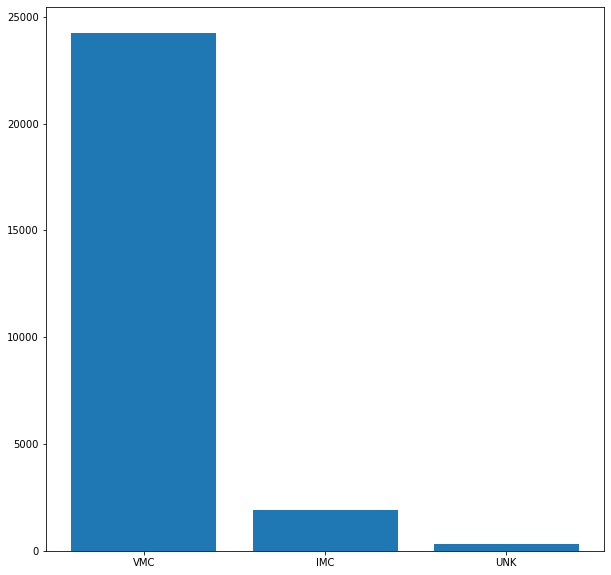

In [103]:
fig, ax = plt.subplots(figsize = (10,10))



ax.bar(x = cessna_weathercond.index, height = cessna_weathercond.values)

In [47]:
df_make_wcond_group = df_edited.groupby(['Make', 'Weather.Condition'])

In [48]:
df_make_wcond_group.get_group(('Cessna', 'VMC')).head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,0.001992,0.009356,0.0,0.000000
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,0.000000,0.000000,0.0,0.000453
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,VMC,Unknown,Probable Cause,02-01-1983,0.005976,0.000000,0.0,0.000000
18,20020917X02481,Accident,NYC82DA016,1982-01-02,"GALETON, PA",United States,NaN,NaN,5G6,CHERRY SPRINGS,...,0.0,1.0,VMC,Taxi,Probable Cause,02-01-1983,0.000000,0.000000,0.0,0.000226
20,20020917X01894,Accident,CHI82FEC08,1982-01-02,"YPSILANTI, MI",United States,NaN,NaN,YIP,WILLOW RUN,...,0.0,1.0,VMC,Takeoff,Probable Cause,02-01-1983,0.000000,0.000000,0.0,0.000226


In [49]:
len(df_make_wcond_group.get_group(('Cessna', 'VMC')))

24244

In [50]:
df_make_wcond_group.get_group(('Cessna', 'VMC'))['perc_of_total_fatal'].sum()

11.473875022409912

In [51]:
df_make_wcond_group.get_group(('Cessna', 'IMC'))['perc_of_total_fatal'].sum()

5.185155674189756

In [52]:
df_make_wcond_group.get_group(('Cessna', 'UNK'))['perc_of_total_fatal'].sum()

0.852572657915181

In [53]:
df_make_wcond_group.get_group(('Cessna', 'VMC'))

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,0.001992,0.009356,0.0,0.000000
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,0.000000,0.000000,0.0,0.000453
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,VMC,Unknown,Probable Cause,02-01-1983,0.005976,0.000000,0.0,0.000000
18,20020917X02481,Accident,NYC82DA016,1982-01-02,"GALETON, PA",United States,NaN,NaN,5G6,CHERRY SPRINGS,...,0.0,1.0,VMC,Taxi,Probable Cause,02-01-1983,0.000000,0.000000,0.0,0.000226
20,20020917X01894,Accident,CHI82FEC08,1982-01-02,"YPSILANTI, MI",United States,NaN,NaN,YIP,WILLOW RUN,...,0.0,1.0,VMC,Takeoff,Probable Cause,02-01-1983,0.000000,0.000000,0.0,0.000226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88820,20221128106367,Accident,CEN23LA049,2022-11-24,"Durango, CO",United States,037646N,1074918W,NaN,NaN,...,0.0,2.0,VMC,NaN,NaN,30-11-2022,0.000000,0.000000,0.0,0.000453
88833,20221128106369,Accident,CEN23FA050,2022-11-28,"Gage, OK",United States,361745N,0994635W,GAG,GAGE,...,0.0,0.0,VMC,NaN,NaN,14-12-2022,0.003984,0.000000,0.0,0.000000
88844,20221206106424,Accident,WPR23LA054,2022-12-04,"Fergus Falls, MN",United States,046936N,0096524W,FFM,Fergus Falls Municipal Airport,...,0.0,2.0,VMC,NaN,NaN,13-12-2022,0.000000,0.000000,0.0,0.000453
88865,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,355745N,0835218W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,0.0,1.0,VMC,NaN,NaN,15-12-2022,0.000000,0.000000,0.0,0.000226


# Creating new col for year

In [177]:
df_edited['Event.Date'][0][:4]

'1948'

In [178]:
df_edited['year'] = df_edited['Event.Date'].str.split('-').str[0]

In [179]:
#df_edited.drop(['year'], axis = 1, inplace = True)

In [180]:
df_edited

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,total_pop,perc_of_total_fatal,perc_of_total_serious,perc_of_total_minor,perc_of_total_uninjured,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,UNK,Cruise,Probable Cause,NaN,2.0,0.003984,0.000000,0.0,0.000000,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,UNK,Unknown,Probable Cause,19-09-1996,4.0,0.007968,0.000000,0.0,0.000000,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,IMC,Cruise,Probable Cause,26-02-2007,3.0,0.005976,0.000000,0.0,0.000000,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,IMC,Cruise,Probable Cause,12-09-2000,2.0,0.003984,0.000000,0.0,0.000000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,VMC,Approach,Probable Cause,16-04-1980,3.0,0.001992,0.009356,0.0,0.000000,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29-12-2022,1.0,0.000000,0.004678,0.0,0.000000,2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,2022
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,VMC,NaN,NaN,27-12-2022,1.0,0.000000,0.000000,0.0,0.000226,2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,2022


# Making a df of only top 20

In [61]:
top20

['cessna',
 'piper',
 'beech',
 'boeing',
 'bell',
 'mooney',
 'robinson',
 'grumman',
 'bellanca',
 'hughes',
 'schweizer',
 'air tractor',
 'aeronca',
 'mcdonnell douglas',
 'maule',
 'champion',
 'stinson',
 'aero commander',
 'de havilland',
 'luscombe']

In [62]:
df_20 = df_edited[ (df_edited['Make'] == 'Cessna') | (df_edited['Make'] == 'Piper') | (df_edited['Make'] == 'Beech') | (df_edited['Make'] == 'Boeing') | (df_edited['Make'] == 'Bell') | (df_edited['Make'] == 'Mooney') | (df_edited['Make'] == 'Robinson') | (df_edited['Make'] == 'Grumman') | (df_edited['Make'] == 'Bellanca') | (df_edited['Make'] == 'Hughes') | (df_edited['Make'] == 'Schweizer') | (df_edited['Make'] == 'Air tractor') | (df_edited['Make'] == 'Aeronca') | (df_edited['Make'] == 'Mcdonnell douglas') | (df_edited['Make'] == 'Maule') | (df_edited['Make'] == 'Champion') | (df_edited['Make'] == 'Stinson') | (df_edited['Make'] == 'Aero commander') | (df_edited['Make'] == 'De havilland') | (df_edited['Make'] == 'Luscombe') | (df_edited['Make'] == 'Bellanca')]

In [63]:
df_20['Make'].value_counts()

Cessna               27215
Piper                14946
Beech                 5462
Bell                  2846
Boeing                2833
Robinson              1691
Grumman               1647
Mooney                1385
Bellanca              1047
Hughes                 946
Air tractor            918
Schweizer              835
Mcdonnell douglas      662
Aeronca                641
Champion               623
Maule                  591
Stinson                450
Aero commander         429
De havilland           422
Luscombe               416
Name: Make, dtype: int64

In [162]:
### This is a cleaner way to do it you ape

In [163]:
makes_to_keep = ['cessna', 'piper', 'boeing', 'mooney', 'bellanca', 'grumman', 'airbus', 'maule', 'aeronca', 'air tractor', 'cirrus design corp', 'beech' , 'champion', 'luscombe', 'embraer', 'stinson', 'cirrus', 'vans', 'north american', 'mcdonnell douglas']

In [64]:
makes_to_keep = top20

In [65]:
makes_to_keep = [x.capitalize() for x in makes_to_keep]
makes_to_keep

['Cessna',
 'Piper',
 'Beech',
 'Boeing',
 'Bell',
 'Mooney',
 'Robinson',
 'Grumman',
 'Bellanca',
 'Hughes',
 'Schweizer',
 'Air tractor',
 'Aeronca',
 'Mcdonnell douglas',
 'Maule',
 'Champion',
 'Stinson',
 'Aero commander',
 'De havilland',
 'Luscombe']

In [66]:
df_top20 = df_edited.loc[df_edited['Make'].isin(makes_to_keep)]

In [67]:
df_top20['Make'].value_counts()

Cessna               27215
Piper                14946
Beech                 5462
Bell                  2846
Boeing                2833
Robinson              1691
Grumman               1647
Mooney                1385
Bellanca              1047
Hughes                 946
Air tractor            918
Schweizer              835
Mcdonnell douglas      662
Aeronca                641
Champion               623
Maule                  591
Stinson                450
Aero commander         429
De havilland           422
Luscombe               416
Name: Make, dtype: int64

# Messing around with Phase

In [68]:
df_20['Broad.phase.of.flight'].value_counts()

Landing        12730
Takeoff         9397
Cruise          8137
Maneuvering     5703
Approach        5004
Taxi            1588
Climb           1524
Descent         1463
Go-around       1187
Standing         719
Unknown          421
Other             73
Name: Broad.phase.of.flight, dtype: int64

In [69]:
df_20['Broad.phase.of.flight'] = df_20['Broad.phase.of.flight'].fillna('Unknown')

<ipython-input-69-3fd2c0d01116>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['Broad.phase.of.flight'] = df_20['Broad.phase.of.flight'].fillna('Unknown')


In [70]:
df_20['Broad.phase.of.flight'].value_counts()

Unknown        18480
Landing        12730
Takeoff         9397
Cruise          8137
Maneuvering     5703
Approach        5004
Taxi            1588
Climb           1524
Descent         1463
Go-around       1187
Standing         719
Other             73
Name: Broad.phase.of.flight, dtype: int64

In [71]:
total_broad_phase = df_20['Broad.phase.of.flight'].value_counts()

In [72]:
make_group = df_20.groupby('Make')

In [73]:
make_group.get_group('Cessna')['Broad.phase.of.flight'].value_counts()

Unknown        6677
Landing        6455
Takeoff        3864
Cruise         3449
Approach       2127
Maneuvering    1814
Taxi            730
Descent         637
Go-around       610
Climb           560
Standing        262
Other            30
Name: Broad.phase.of.flight, dtype: int64

In [74]:
cessna_broad_phase = make_group.get_group('Cessna')['Broad.phase.of.flight'].value_counts()

In [75]:
cessna_broad_phase.index

Index(['Unknown', 'Landing', 'Takeoff', 'Cruise', 'Approach', 'Maneuvering',
       'Taxi', 'Descent', 'Go-around', 'Climb', 'Standing', 'Other'],
      dtype='object')

In [76]:
cessna_broad_phase.values

array([6677, 6455, 3864, 3449, 2127, 1814,  730,  637,  610,  560,  262,
         30], dtype=int64)

In [77]:
make_group.get_group('Piper')['Broad.phase.of.flight'].value_counts()

Unknown        3901
Landing        2783
Takeoff        2402
Cruise         2059
Approach       1262
Maneuvering    1070
Climb           390
Taxi            337
Descent         314
Go-around       298
Standing        113
Other            17
Name: Broad.phase.of.flight, dtype: int64

In [85]:
phase_keys = df_20['Broad.phase.of.flight'].value_counts().index.tolist()
phase_keys

['Unknown',
 'Landing',
 'Takeoff',
 'Cruise',
 'Maneuvering',
 'Approach',
 'Taxi',
 'Climb',
 'Descent',
 'Go-around',
 'Standing',
 'Other']

In [87]:
phase_dict = {}

In [89]:
i = 0
for key in phase_keys:
    phase_dict[key] = i
    i += 1
phase_dict

{'Unknown': 0,
 'Landing': 1,
 'Takeoff': 2,
 'Cruise': 3,
 'Maneuvering': 4,
 'Approach': 5,
 'Taxi': 6,
 'Climb': 7,
 'Descent': 8,
 'Go-around': 9,
 'Standing': 10,
 'Other': 11}

In [94]:
phase_dict.items()

dict_items([('Unknown', 0), ('Landing', 1), ('Takeoff', 2), ('Cruise', 3), ('Maneuvering', 4), ('Approach', 5), ('Taxi', 6), ('Climb', 7), ('Descent', 8), ('Go-around', 9), ('Standing', 10), ('Other', 11)])

In [95]:
for ind in df_20.index:
    for key, value in phase_dict.items():
        if key == df_20['Broad.phase.of.flight'][ind]:
            df_20['phase_key'][ind] = value

<ipython-input-95-6ecf54ef9547>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['phase_key'][ind] = value
F:\Anaconda\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [90]:
df_20['Broad.phase.of.flight']

0          Cruise
1         Unknown
2          Cruise
4        Approach
5           Climb
           ...   
88884     Unknown
88885     Unknown
88886     Unknown
88887     Unknown
88888     Unknown
Name: Broad.phase.of.flight, Length: 66005, dtype: object

In [96]:
df_20['phase_key']

0        3
1        0
2        3
4        5
5        7
        ..
88884    0
88885    0
88886    0
88887    0
88888    0
Name: phase_key, Length: 66005, dtype: int64

In [112]:
groupedphase = df_20.groupby('Make')
groupedphase.get_group('Cessna')['Broad.phase.of.flight'].value_counts().index

Index(['Unknown', 'Landing', 'Takeoff', 'Cruise', 'Approach', 'Maneuvering',
       'Taxi', 'Descent', 'Go-around', 'Climb', 'Standing', 'Other'],
      dtype='object')

In [121]:
groupedphase_list_name = groupedphase.get_group('Cessna')['Broad.phase.of.flight'].value_counts().keys().tolist()
groupedphase_list_value = groupedphase.get_group('Cessna')['Broad.phase.of.flight'].value_counts().tolist()

Text(0.5, 1.0, 'Cessna phase vs number of crashes')

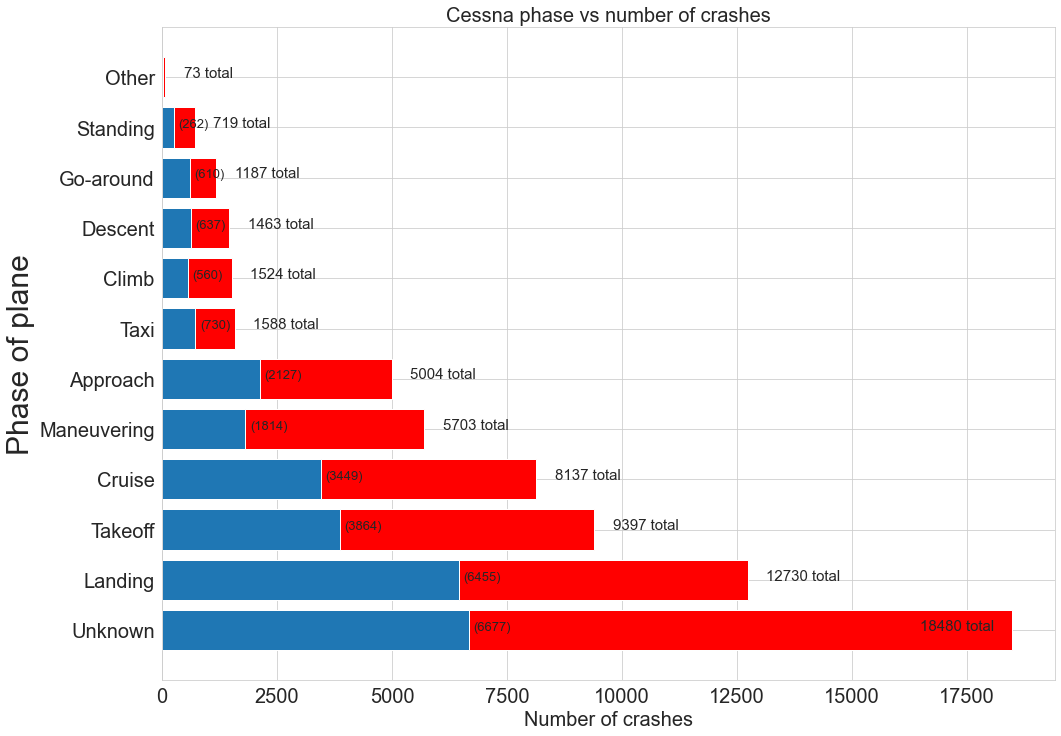

In [166]:
fig, ax = plt.subplots(figsize = (16,12))

ax.barh(total_broad_phase_name, total_broad_phase_value, color = 'red')

ax.barh( groupedphase_list_name, groupedphase_list_value )




i = 0
for value in groupedphase_list_value:
    if groupedphase_list_name[i] == 'Other':
        i += 1
        continue
    else:
        ax.annotate(f"({value})", xy = (value + 100, groupedphase_list_name[i]), fontsize = 13)
        i+= 1
j = 0
for value in total_broad_phase_value:
    if total_broad_phase_name[j] == 'Unknown':
        ax.annotate(f"{value} total", xy = (value - 2000, total_broad_phase_name[j]), fontsize = 15)
        j += 1
    else:
        ax.annotate(f"{value} total", xy = (value + 400, total_broad_phase_name[j]), fontsize = 15)
        j+= 1

ax.set_xlabel('Number of crashes', fontsize =20)
plt.xticks(fontsize = 20)

ax.set_ylabel('Phase of plane', fontsize=30)
plt.yticks(fontsize = 20)

ax.set_title('Cessna phase vs number of crashes', fontsize = 20)


In [152]:
total_broad_phase_name = df_20['Broad.phase.of.flight'].value_counts().keys().tolist()
total_broad_phase_value = df_20['Broad.phase.of.flight'].value_counts().tolist()

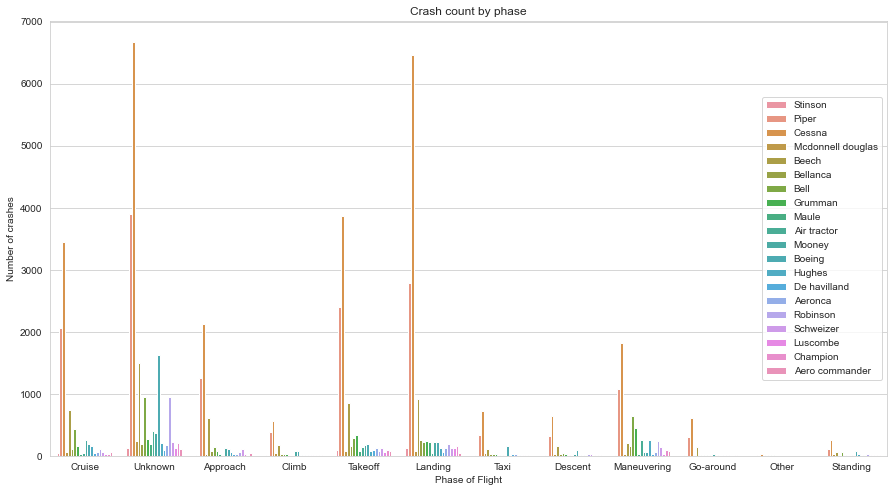

In [102]:
sns.set_style('whitegrid')

plt.figure(figsize = (15,8))

sns.countplot(data = df_20, x = 'Broad.phase.of.flight', hue = 'Make')

plt.title('Crash count by phase')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of crashes')
plt.legend(loc = 'center right')
plt.show()

# Save out

In [186]:
df_edited.to_csv('df_share2.csv')

In [137]:
sum_engine_make.to_csv('sum_eng_make.csv')

In [2]:
df_edited

NameError: name 'df_edited' is not defined